<a href="https://colab.research.google.com/github/GurkiratSarna/CE888-Decision-Making-UoE/blob/master/Lab_7/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We perform CNN on a datset taken from Kaggle https://www.kaggle.com/prasunroy/natural-images. The datset had 8 folders but we have picked only 3 folders - airplane, car and motorbike.

In [0]:
from google.colab import files

#Delete the folders from colab
#!rm -rf natural_images
#!rm -rf natural_images_ttv
#!rm -rf natural_images.zip

In [45]:
#check current directory
import os
os.getcwd()

'/content'

In [21]:
#Unrar the manually loaded file
!pip install patool
import patoolib
patoolib.extract_archive("natural_images.rar", outdir="/content")

     |████████████████████████████████| 81kB 2.3MB/s 
patool: Extracting natural_images.rar ...
patool: running /usr/bin/unrar x -- /content/natural_images.rar
patool:     with cwd='/content'
patool: ... natural_images.rar extracted to `/content'.


'/content'

In [0]:
#Unzip the manually loaded file - not needed for now
'''from zipfile import ZipFile

file_name = "/content/natural_images.zip" # data is availbale in github

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')'''

In [40]:
#data_dir_list = os.listdir('/content/natural_images')
#print(data_dir_list)

#Number of airplane files
path_a, dirs_a, files_a = next(os.walk("/content/natural_images/airplane")) 
file_count_a = len(files_a)
print(file_count_a)

727


In [38]:
#Number of car files
path_c, dirs_c, files_c = next(os.walk("/content/natural_images/car")) 
file_count_c = len(files_c)
print(file_count_c)

968


In [39]:
#Number of motorbike files
path_m, dirs_m, files_m = next(os.walk("/content/natural_images/motorbike")) 
file_count_m = len(files_m)
print(file_count_m)

788


In [0]:
#Define orginal directory and the base directory where train, test and validation folders will be created.
original_dataset_dir = '/content/natural_images'
base_dir = '/content/natural_images_ttv'
os.mkdir(base_dir)

In [0]:
#Create a train folder under the base directory
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

#Create a validation folder under the base directory
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Create a test folder under the base directory
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#Create an airplane folder under the train folder
train_airplane_dir = os.path.join(train_dir, 'airplane')
os.mkdir(train_airplane_dir)

#Create a car folder under the train folder
train_car_dir = os.path.join(train_dir, 'car')
os.mkdir(train_car_dir)

#Create a motorbike folder under the train folder
train_motorbike_dir = os.path.join(train_dir, 'motorbike')
os.mkdir(train_motorbike_dir)

#Create an airplane folder under the validation folder
validation_airplane_dir = os.path.join(validation_dir, 'airplane')
os.mkdir(validation_airplane_dir)

#Create a car folder under the validation folder
validation_car_dir = os.path.join(validation_dir, 'car')
os.mkdir(validation_car_dir)

#Create a motorbike folder under the validation folder
validation_motorbike_dir = os.path.join(validation_dir, 'motorbike')
os.mkdir(validation_motorbike_dir)

#Create an airplane folder under the test folder
test_airplane_dir = os.path.join(test_dir, 'airplane')
os.mkdir(test_airplane_dir)

#Create a car folder under the test folder
test_car_dir = os.path.join(test_dir, 'car')
os.mkdir(test_car_dir)

#Create a motorbike folder under the test folder
test_motorbike_dir = os.path.join(test_dir, 'motorbike')
os.mkdir(test_motorbike_dir)

In [0]:
import shutil

Dividing 80% for train and 10% for validation and 10% for test for all the classes namely airplane, car and motorbike


In [0]:
original_dataset_dir_a = '/content/natural_images/airplane'
fnames = ['airplane_{}.jpg'.format(str(i).zfill(4)) for i in range(581)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_a, fname)
    dst = os.path.join(train_airplane_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['airplane_{}.jpg'.format(str(i).zfill(4)) for i in range(581, 654)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_a, fname)
    dst = os.path.join(validation_airplane_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['airplane_{}.jpg'.format(str(i).zfill(4)) for i in range(654, 727)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_a, fname)
    dst = os.path.join(test_airplane_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
original_dataset_dir_c = '/content/natural_images/car'    
fnames = ['car_{}.jpg'.format(str(i).zfill(4)) for i in range(772)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_c, fname)
    dst = os.path.join(train_car_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['car_{}.jpg'.format(str(i).zfill(4)) for i in range(772, 870)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_c, fname)
    dst = os.path.join(validation_car_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['car_{}.jpg'.format(str(i).zfill(4)) for i in range(870, 968)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_c, fname)
    dst = os.path.join(test_car_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
original_dataset_dir_m = '/content/natural_images/motorbike' 
fnames = ['motorbike_{}.jpg'.format(str(i).zfill(4)) for i in range(630)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_m, fname)
    dst = os.path.join(train_motorbike_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['motorbike_{}.jpg'.format(str(i).zfill(4)) for i in range(630, 709)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_m, fname)
    dst = os.path.join(validation_motorbike_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['motorbike_{}.jpg'.format(str(i).zfill(4)) for i in range(709, 788)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_m, fname)
    dst = os.path.join(test_motorbike_dir, fname)
    shutil.copyfile(src, dst)

In [103]:
print('total training airplane images:', len(os.listdir(train_airplane_dir)), 'in directory : ', train_airplane_dir)
print('total validation airplane images:', len(os.listdir(validation_airplane_dir)), 'in directory : ', validation_airplane_dir)
print('total test airplane images:', len(os.listdir(test_airplane_dir)), 'in directory : ', test_airplane_dir)

print('total training car images:', len(os.listdir(train_car_dir)), 'in directory : ', train_car_dir)
print('total validation car images:', len(os.listdir(validation_car_dir)), 'in directory : ', validation_car_dir)
print('total test car images:', len(os.listdir(test_car_dir)), 'in directory : ', test_car_dir)

print('total training motorbike images:', len(os.listdir(train_motorbike_dir)), 'in directory : ', train_motorbike_dir)
print('total validation motorbike images:', len(os.listdir(validation_motorbike_dir)), 'in directory : ', validation_motorbike_dir)
print('total test motorbike images:', len(os.listdir(test_motorbike_dir)), 'in directory : ', test_motorbike_dir)

total training airplane images: 581 in directory :  /content/natural_images_ttv/train/airplane
total validation airplane images: 73 in directory :  /content/natural_images_ttv/validation/airplane
total test airplane images: 73 in directory :  /content/natural_images_ttv/test/airplane
total training car images: 772 in directory :  /content/natural_images_ttv/train/car
total validation car images: 98 in directory :  /content/natural_images_ttv/validation/car
total test car images: 98 in directory :  /content/natural_images_ttv/test/car
total training motorbike images: 630 in directory :  /content/natural_images_ttv/train/motorbike
total validation motorbike images: 79 in directory :  /content/natural_images_ttv/validation/motorbike
total test motorbike images: 79 in directory :  /content/natural_images_ttv/test/motorbike


In [104]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [105]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), #Root mean square (RMS)
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [108]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 1983 images belonging to 3 classes.
Found 250 images belonging to 3 classes.


In [109]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)




Epoch 1/30





100/100 [==============================] - 91s 911ms/step - loss: -2.7812 - acc: 0.4498 - val_loss: -5.0290 - val_acc: 0.6400
Epoch 2/30
100/100 [==============================] - 90s 901ms/step - loss: -4.4311 - acc: 0.5744 - val_loss: -4.5726 - val_acc: 0.6789
Epoch 3/30
100/100 [==============================] - 90s 902ms/step - loss: -4.6107 - acc: 0.6094 - val_loss: -4.7968 - val_acc: 0.6632
Epoch 4/30
100/100 [==============================] - 90s 901ms/step - loss: -4.6754 - acc: 0.6167 - val_loss: -5.2012 - val_acc: 0.6632
Epoch 5/30
100/100 [==============================] - 90s 904ms/step - loss: -4.8649 - acc: 0.6266 - val_loss: -5.2364 - val_acc: 0.6600
Epoch 6/30
100/100 [==============================] - 90s 901ms/step - loss: -4.8144 - acc: 0.6362 - val_loss: -4.7414 - val_acc: 0.6947
Epoch 7/30
100/100 [==============================] - 90s 903ms/step - loss: -4.8916 - acc: 0.6434 - val_loss: -5.0173 - val_acc: 0.6737
Epoch 8/30
100/100 [=============

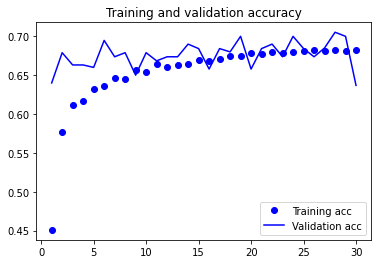

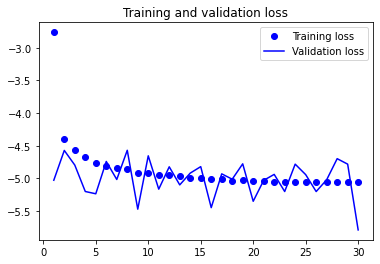

In [110]:
model.save('airplane_cars_motorbike.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Convolutional Networks with Dropout**

In [111]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), #Root Mean Square (RMS)
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [112]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 1983 images belonging to 3 classes.
Found 250 images belonging to 3 classes.
Epoch 1/20
100/100 [==============================] - 177s 2s/step - loss: -2.1089 - acc: 0.4089 - val_loss: -3.3475 - val_acc: 0.4341
Epoch 2/20
100/100 [==============================] - 174s 2s/step - loss: -3.7905 - acc: 0.5003 - val_loss: -4.5638 - val_acc: 0.5965
Epoch 3/20
100/100 [==============================] - 173s 2s/step - loss: -3.7421 - acc: 0.5175 - val_loss: -4.4128 - val_acc: 0.5486
Epoch 4/20
100/100 [==============================] - 173s 2s/step - loss: -4.0349 - acc: 0.5317 - val_loss: -4.5036 - val_acc: 0.5764
Epoch 5/20
100/100 [==============================] - 173s 2s/step - loss: -4.0757 - acc: 0.5394 - val_loss: -3.9838 - val_acc: 0.4706
Epoch 6/20
100/100 [==============================] - 174s 2s/step - loss: -4.1825 - acc: 0.5448 - val_loss: -4.4191 - val_acc: 0.5965
Epoch 7/20
100/100 [==============================] - 174s 2s/step - loss: -4.2495 - acc: 0.5456 - val_loss

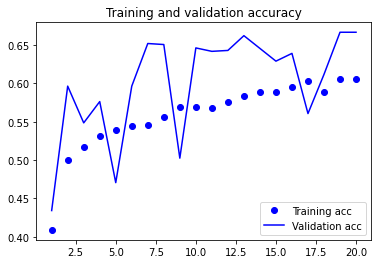

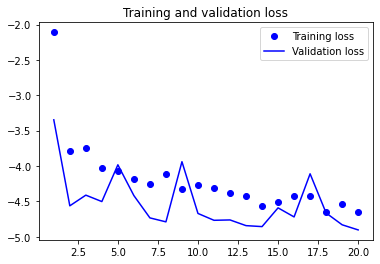

In [113]:
model.save('airplane_cars_motorbike_2.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()